In [1]:
# importando bibliotecas

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
# atribuindo o nome das colunas (usando o csv como referência)

dataset = pd.read_csv('dataset/data-set-clube-new-v2.csv', sep=';')

In [3]:
dataset.head(1)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,38810,CANCELADO,24,0,0,0


In [4]:
#  retirando a coluna matrícula, não será necessária agora

dataset = dataset.drop(['id_socio'], axis=1)

In [5]:
# Pegando o último resultado do arquivo csv para servir de referência e tentar classificá-lo com o KNN

# Analisando o ponto:

#   sua média está abaixo de 7 (média da Faculdade);
#   não tem faltas (dúvida se realmente foi lançada a frequência no diário);
#   está com uma parcela em aberto;
#   ele é desistente (Ponto que queremos validar).

dataset.tail(1)

,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
3026,ATIVO,51,4,12,15


In [6]:
# criando um vetor de todos os elementos do dataset menos o último.

X_train = dataset.values[1:,1:]
y_train = dataset.values[1:,0]

In [7]:
# criando um vetor de test com o último elemento do dataset

X_test = dataset.values[0][1:] # 51   4   12    15  (como mostra o penúltimo comando)
y_test = dataset.values[0][0]  # ATIVO           (como mostra o penúltimo comando)

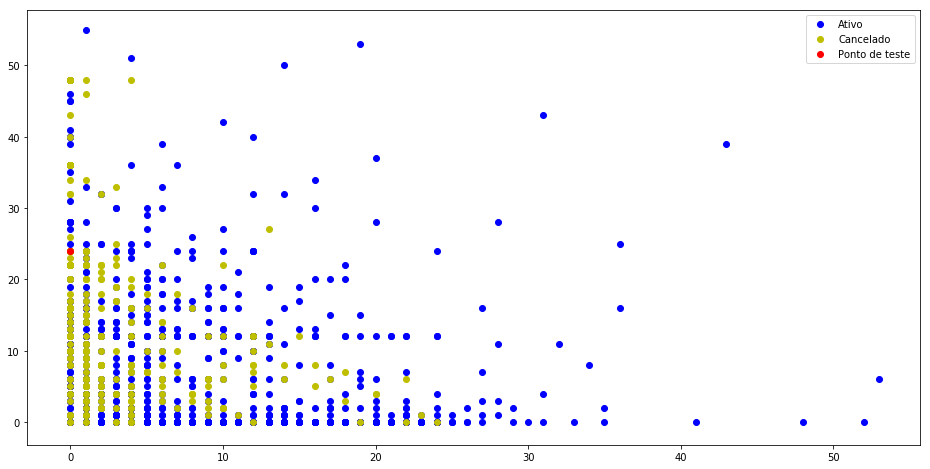

In [8]:
#  Plotando todos os pontos do data set e o ponto de referência para a classificação


plt.figure(figsize=(16,8))
y_map = {label: idx for idx, label in enumerate(np.unique(dataset['status']))}
plt.scatter(X_train[y_train == 'ATIVO' , 1], X_train[y_train == 'ATIVO', 0], c='b', label='Ativo')
plt.scatter(X_train[y_train == 'CANCELADO' , 1], X_train[y_train == 'CANCELADO', 0], c='y', label='Cancelado')
plt.scatter(X_test[1], X_test[0], c='r', label='Ponto de teste')
plt.legend()

In [9]:
#  Definindo o model e a quantidade de "K" e tipo de métrica que usaremos (usando um K ímpar)

model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

In [10]:
# fazendo o treino de test X e Y

model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [11]:
# Plotando o ponto escolhido e a quantidade de "k" que estamos usando

pontos = model.kneighbors_graph([X_test], 7).toarray()

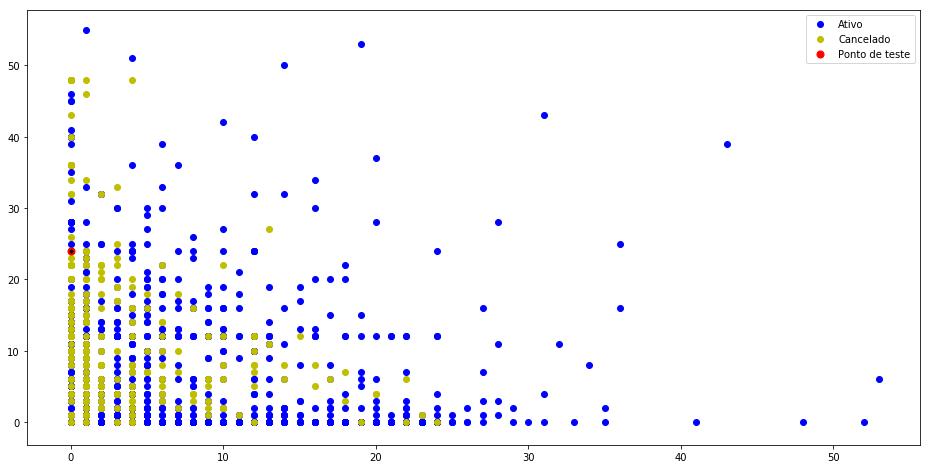

In [12]:
plt.figure(figsize=(16,8))
y_map = {label: idx for idx, label in enumerate(np.unique(dataset['status']))}
plt.scatter(X_train[y_train == 'ATIVO' , 1], X_train[y_train == 'ATIVO', 0], c='b', label='Ativo')
plt.scatter(X_train[y_train == 'CANCELADO' , 1], X_train[y_train == 'CANCELADO', 0], c='y', label='Cancelado')

plt.scatter(X_test[1], X_test[0], c='r', label='Ponto de teste', s=50)

# destaca com um ponto preto os 7 pontos mais próximos do KNN
plt.scatter(X_train[pontos[0] == 1, 1],X_train[pontos[0] == 1,0], c='Black',s=5)

plt.legend()

In [13]:
# com base no modelo KNN o status da nosso ponto de teste tesrá que ser: CANCELADO

model.predict([X_test])

array(['CANCELADO'], dtype=object)

In [14]:
print(X_test)

[24 0 0 0]


In [15]:
# status confere corretamente com o esperado

print(y_test)

CANCELADO
